### Binary Logistic Regression, Multinomial logistic regression
classification algorithm
1. binary logistic regression (using sigmoid)
$yhat=sigmoid(X.w+b)$ <br/>
2. Softmax regression (or multinomial logistic regression) 
$yhat=softmax(X.w+b)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

<b>Toy Data</b>

(11, 2) (11, 1)


Text(0.5, 1.0, 'toy dataset for binary classification')

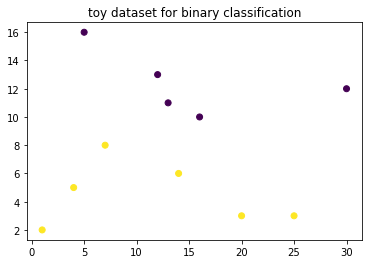

In [69]:
X=np.array([[1, 2], [4, 5], [12, 13], [16, 10], [20, 3], [5, 16] ,[30,12], [25,3], [13,11] , [14,6], [7,8]])
y=np.array([1, 1, 0, 0,  1, 0, 0,1, 0, 1, 1]).reshape(-1,1)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1] , c=y)
plt.title('toy dataset for binary classification')

In [56]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [72]:
w=np.zeros((X.shape[1])).reshape(-1,1)
b=0

In [193]:
w=np.zeros((X.shape[1])).reshape(-1,1)
b=0
lr=0.1
nepoch=500
m=X.shape[0]
losses=[]

for i in range(nepoch):
    yhat=sigmoid(X@w +b)  
    ls=np.sum(  (- y * np.log(yhat) - (1 - y ) * np.log(1 - yhat) )  ) /m
    losses.append(ls)
    dw=  (X.T @(yhat-y) )/m
    db=  np.sum( yhat-y) /m
    w=w-lr*dw
    b=b-lr*db

Text(0.5, 1.0, 'loss vs epoch')

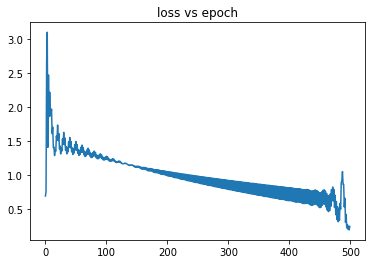

In [194]:
plt.plot(losses)
plt.title('loss vs epoch')

In [195]:
print('w:', w)
print('b:', b)

w: [[ 0.12]
 [-0.81]]
b: 5.788178854640305


<b>Training accuracy</b>

In [196]:
yhat=sigmoid(X@w +b)  
yhat[yhat<=0.5]=0
yhat[yhat>0.5]=1
acc=(yhat==y).mean()*100
print('training accuracy=', acc)

training accuracy= 100.0


<b>Plotting the hyperplane</b>

[ 7.16 12.38]


(-1.0, 19.0)

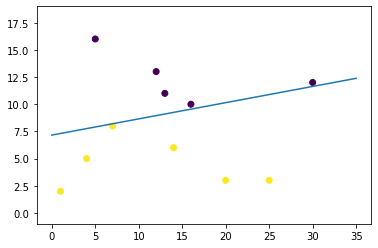

In [197]:
#using the standard line equation: Ax+By+C=0
C=b
A,B=w[0], w[1]
xcord=np.array([0.0, 35.0])
ycord=(-C-A*xcord)/B
print(ycord)

plt.scatter(X[:,0], X[:,1] , c=y) 
plt.plot(xcord,ycord)
plt.ylim(np.min(X[:, 1])-3, np.max(X[:, 1])+3)

 <b>Plotting decision boundary using meshgrid</b>

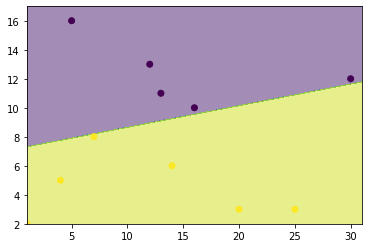

In [226]:
xlim=[np.min(X[:,0]), np.max(X[:,0])]
ylim=[np.min(X[:,1]), np.max(X[:,1])]
xd = np.linspace(xlim[0], xlim[1], 100)
yd = np.linspace(ylim[0], ylim[1], 100)

xd=np.arange(xlim[0], xlim[1]+1,  0.01)
yd=np.arange(ylim[0], ylim[1]+1, 0.01)

xx,yy=np.meshgrid(xd,yd) 
nx=np.array([xx.flatten(), yy.flatten()]).T

z=sigmoid( nx @ w + b )

z[z<0.5]=0
z[z>=0.5]=1
out=z.reshape(xx.shape) 

plt.contourf(xx, yy, out, alpha=0.5 )
plt.scatter(X[:,0],X[:, 1],  c=y ) 
plt.show()

<b>Test on new data</b>

In [227]:
tx=np.array([10,15]) 
yhat=sigmoid(tx @ w +b)
c=0 if yhat <=0.5 else 1
print('test x:', tx)
print('prediction:',c)

tx=np.array([12,5]) 
yhat=sigmoid(tx @ w +b)
c=0 if yhat <=0.5 else 1
print('test x:', tx)
print('prediction:',c)

test x: [10 15]
prediction: 0
test x: [12  5]
prediction: 1


### Multiclass logistic regression on IRIS data 

1. using multiclass crossentropy loss
2. using softmax

In [10]:
def softmax(z):
#     se=np.exp(z)
    se=np.exp(z - np.max(z) )
    res=se/np.sum(se, axis=1).reshape(-1,1)
    return res

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris =  datasets.load_iris() 
X = iris.data
y = iris.target.reshape(-1,1)
print('X shape:', X.shape, 'y shape:', y.shape)


num_classes=np.max(y)+1 #classes are 0,1,2 
print('num classes:', num_classes)

X shape: (150, 4) y shape: (150, 1)
num classes: 3


In [36]:
#convert y to categorical
ycat=[]
for i in range(y.shape[0]):
    cat=np.eye(num_classes)[y[i][0]] 
    ycat.append(cat)

ycat=np.array(ycat)
print('categorical y shape: ', ycat.shape)
print('first 3 labels:\n', ycat[:3])

categorical y shape:  (150, 3)
first 3 labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(  X, ycat, test_size=0.33 )
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (100, 4) y_train: (100, 3)
X_test: (50, 4) y_test: (50, 3)


In [15]:
num_features=X_train.shape[1]
w=np.random.rand(num_features, num_classes)  
print('w shape:', w.shape)

w shape: (4, 3)


In [16]:
z=X_train@w
z.shape

(100, 3)

In [17]:
b.shape

(1,)

w shape: (4, 3)


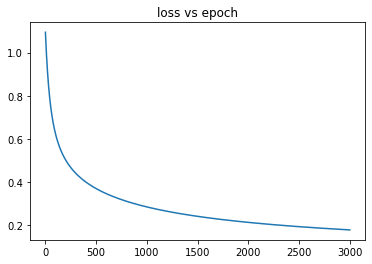

In [18]:
w=np.random.rand(num_features, num_classes)*0.01  
b=np.zeros(num_classes)
print('w shape:', w.shape)
lr=0.01
nepoch=3000 
losses=[]

for i in range(nepoch):
    yhat=softmax(X_train@w + b)  
    loss= np.sum( - y_train*np.log(yhat) )/ X_train.shape[0]
    losses.append(loss)
    dz=(yhat-y_train)
    dw=  (X_train.T @dz )/X_train.shape[0]
    db= np.sum(dz, axis=0)
    w=w-lr*dw
    b=b-lr*db

plt.plot(losses)
plt.title('loss vs epoch')
plt.show()

In [19]:
print('Trained w:\n', w)
print('Trained b:\n', b)

Trained w:
 [[-0.3   0.23  0.08]
 [ 0.77 -0.36 -0.4 ]
 [-1.99  0.05  1.95]
 [-0.86 -0.5   1.37]]
Trained b:
 [ 7.35  2.06 -9.41]


In [30]:
yhat=softmax(X_test @ w + b)
yhat[:3]

array([[9.35e-01, 6.49e-02, 1.83e-05],
       [1.06e-04, 2.04e-01, 7.96e-01],
       [9.85e-01, 1.48e-02, 1.24e-06]])

In [31]:
#Training accuracy
acc=(np.argmax(yhat, axis=1) ==   np.argmax(y_test, axis=1)   ).mean()*100
print('testing accuracy:', acc)

testing accuracy: 98.0


<b>Test on new data</b>

In [32]:
# tx=np.array([[5.1, 3.5, 1.4, 0.2]])
random_i=np.random.randint(X.shape[0])
tx=X[random_i].reshape(1, -1)
act_y=np.argmax(y[random_i])
print('tx=', tx)
yhat=softmax(tx @ w + b)
print('probability:', yhat)
p=np.argmax(yhat, axis=1)
print('prediction:', p[0], 'actual_y:', act_y)

tx= [[6.3 3.4 5.6 2.4]]
probability: [[1.03e-04 6.99e-02 9.30e-01]]
prediction: 2 actual_y: 2


<b>Scikitlearn testing</b>

In [33]:
from sklearn.linear_model import LogisticRegression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(  X, y , test_size=0.33 )
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (100, 4) y_train: (100, 1)
X_test: (50, 4) y_test: (50, 1)


In [39]:
model=LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [49]:
yhat=model.predict(X_test)
yhat=yhat.reshape(-1,1)
acc=(yhat ==  y_test   ).mean()*100
print('testing accuracy:', acc)

testing accuracy: 96.0


In [47]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [50]:
results = confusion_matrix(y_test, yhat) 
print(results)

[[12  0  0]
 [ 0 20  2]
 [ 0  0 16]]


In [51]:
print( classification_report(y_test, yhat) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        22
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50

